In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

In [2]:
cifar10_dir = 'datasets/cifar-10-batches-py'
x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)

In [3]:
print ('Shape of training data = ', x_train.shape)
print ('Shape of training labels = ', y_train.shape)
print ('Shape of testing data = ', x_test.shape)
print ('Shape of testing labels = ', y_test.shape)

Shape of training data =  (50000, 32, 32, 3)
Shape of training labels =  (50000,)
Shape of testing data =  (10000, 32, 32, 3)
Shape of testing labels =  (10000,)


In [4]:
num_training = 5000
mask = range(num_training)
x_train = x_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
x_test = x_test[mask]
y_test = y_test[mask]




In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print (x_train.shape, x_test.shape)

(5000, 3072) (500, 3072)


In [6]:
class NN(object):
    
    def _init_(self):
        pass
    
    def train(self,x,y):
        self.xtr = x
        self.ytr = y
            
    def predictdist(self,x):
        num_test = x.shape[0]
        num_train = self.xtr.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i,j] = np.sqrt(np.sum((x[i,:]-self.xtr[j,:])**2))
        return dists
    
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        
        for i in range(num_test):
            closest_y = []
            y_indicies = np.argsort(dists[i, :], axis = 0)
            closest_y = self.ytr[y_indicies[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
    
        return  y_pred

In [7]:
a = NN()
a.train(x_train,y_train)
dist =a.predictdist(x_test)
print (dist.shape)

(500, 5000)


In [8]:
y_test_pred = a.predict_labels(dist, k=1)

num_wrong = np.sum(y_test_pred != y_test)
error = float(num_wrong) / num_test
print ('Got %d / %d correct => error rate: %f' % (num_wrong, num_test, error))

Got 363 / 500 correct => error rate: 0.726000


In [9]:
k_num = [2,5,10,20]
k_error= {}

for k in k_num:
    k_error[k] = []
    a.train(x_train,y_train)
    dist1 =a.predictdist(x_test)
    y_test_pred = a.predict_labels(dist1, k=k)

    num_wrong = np.sum(y_test_pred != y_test)
    error = float(num_wrong) / num_test
    k_error[k].append(error)
    print ('k = %d, error = %f' % (k, error))
    
    

k = 2, error = 0.776000
k = 5, error = 0.722000
k = 10, error = 0.718000
k = 20, error = 0.728000


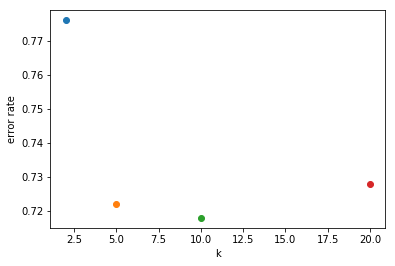

In [10]:
for k in k_num:
    error = k_error[k]
    plt.plot([k], error,'-o')


plt.xlabel('k')
plt.ylabel('error rate')
plt.show()
    


In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for y, cls in enumerate(classes):
#     label_ind[y] = []
    idxs = np.flatnonzero(y_test == y)
    idxs = np.random.choice(idxs, 1, replace=False)
    m=idxs[0]
    closest_y = []
    y_indicies = np.argsort(dist[m, :], axis = 0)
    closest_y = y_train[y_indicies[:10]]
    print('For class %s, labels for 10  nearest neighbours are '% (cls))
    print(closest_y)


For class plane, labels for 10  nearest neighbours are 
[8 7 3 8 8 8 0 4 8 8]
For class car, labels for 10  nearest neighbours are 
[2 6 2 2 2 2 2 5 4 3]
For class bird, labels for 10  nearest neighbours are 
[4 4 4 2 6 2 4 2 5 5]
For class cat, labels for 10  nearest neighbours are 
[5 4 4 2 2 4 2 4 2 4]
For class deer, labels for 10  nearest neighbours are 
[6 2 2 2 6 4 6 3 4 5]
For class dog, labels for 10  nearest neighbours are 
[2 2 2 4 2 2 4 4 3 4]
For class frog, labels for 10  nearest neighbours are 
[4 8 6 4 4 6 6 4 5 6]
For class horse, labels for 10  nearest neighbours are 
[4 6 2 4 2 2 3 0 4 2]
For class ship, labels for 10  nearest neighbours are 
[8 6 0 4 8 8 0 8 8 0]
For class truck, labels for 10  nearest neighbours are 
[8 8 8 9 8 8 0 8 0 0]
